# Mathematical analysis of break-even points and return bounds for option strategies
## Kirill Zakharov
2024

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

plt.style.use('ggplot')

In [2]:
import matplotlib as mpl

#set params for the notebook
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['legend.fontsize'] = 10
mpl.rcParams['axes.labelsize'] = 14

## Growing market strategies

In [7]:
def payoff_call(spot: np.array, strike) -> np.array:
    return np.maximum(spot - strike, 0)

def return_call(spot: np.array, strike, V) -> np.array:
    return payoff_call(spot, strike) - V



def payoff_covered_call(spot: np.array, strike) -> np.array:
    return -payoff_call(spot, strike) + spot #or np.minimum(strike - spot, 0) + spot

def return_covered_call(spot: np.array, strike, V, S) -> np.array:
    return payoff_covered_call(spot, strike) - S + V



def payoff_bull_call_spread(spot: np.array, strike, strike2) -> np.array:
    return payoff_call(spot, strike) - payoff_call(spot, strike2)

def return_bull_call_spread(spot: np.array, strike, strike2, V1, V2) -> np.array:
    return payoff_bull_call_spread(spot, strike, strike2) - V1 + V2



def payoff_put(spot: np.array, strike) -> np.array:
    return np.maximum(strike - spot, 0)

def payoff_cash_secured_put(spot: np.array, strike) -> np.array:
    return -payoff_put(spot, strike)

def return_cash_secured_put(spot: np.array, strike, V) -> np.array:
    return payoff_cash_secured_put(spot, strike) + V



def payoff_inverse_bull_spread(spot: np.array, strike, strike2) -> np.array:
    return -payoff_put(spot, strike) + payoff_call(spot, strike2)

def return_inverse_bull_spread(spot: np.array, strike, strike2, V1, V2) -> np.array:
    return payoff_inverse_bull_spread(spot, strike, strike2) + V1 - V2

In [40]:
N = 180
spot_prices = np.arange(60, N, 2)
K = 120
V = 10
V2 = 6
S = 100
K2 = 150

### 1. Buy Option

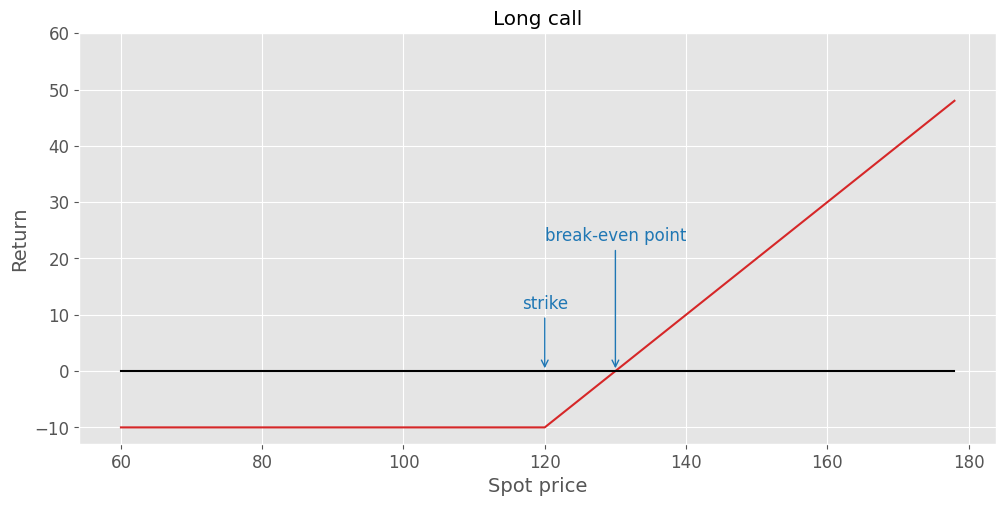

In [41]:
fig, ax = plt.subplots(figsize=(10, 5), dpi=100)

ax.plot(spot_prices, return_call(spot_prices, K, V), color='tab:red')
ax.plot(spot_prices, np.zeros(len(spot_prices)), color='black')

ax.set_xlabel('Spot price')
ax.set_ylabel('Return')

ax.set_yticks(list(np.arange(-10, 70, 10)))
ax.set_xticks(list(np.arange(60, 200, 20)))
# ax.set_xticks(list(ax.get_xticks()) + [120])

ax.annotate("strike", xy=(K, 0), xytext=(K, 12), size=12, va='center', ha='center', arrowprops=dict(arrowstyle='->',lw=1, color='tab:blue'), color='tab:blue')
ax.annotate("break-even point", xy=(K+V, 0), xytext=(K+V, 24), size=12, va='center', ha='center', arrowprops=dict(arrowstyle='->',lw=1, color='tab:blue'), color='tab:blue')
ax.set_title('Long call')

plt.tight_layout(pad=0.5)
# plt.savefig('Growth_1_eng.pdf', dpi=300)
plt.show()

### 2. Covered call option

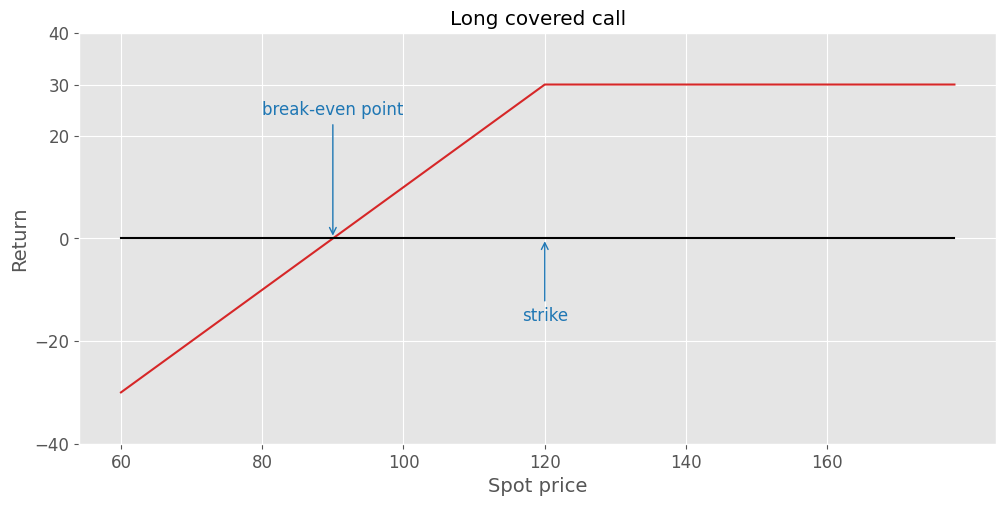

In [42]:
fig, ax = plt.subplots(figsize=(10, 5), dpi=100)

ax.plot(spot_prices, return_covered_call(spot_prices, K, V, S), color='tab:red')
ax.plot(spot_prices, np.zeros(len(spot_prices)), color='black')

ax.set_xlabel('Spot price')
ax.set_ylabel('Return')

ax.set_yticks(list(np.arange(-40, K - S + V + 20, 20)) + [K - S + V])
ax.set_xticks(list(np.arange(60, N, 20)))
# ax.set_xticks(list(ax.get_xticks()) + [120])

ax.annotate("strike", xy=(K, 0), xytext=(K, -15), size=12, va='center', ha='center', arrowprops=dict(arrowstyle='->',lw=1, color='tab:blue'), color='tab:blue')
ax.annotate("break-even point", xy=(S-V, 0), xytext=(S-V, 25), size=12, va='center', ha='center', arrowprops=dict(arrowstyle='->',lw=1, color='tab:blue'), color='tab:blue')
ax.set_title('Long covered call')

plt.tight_layout(pad=0.5)
# plt.savefig('Growth_2_eng.pdf', dpi=300)
plt.show()

### 3. Bull call spread

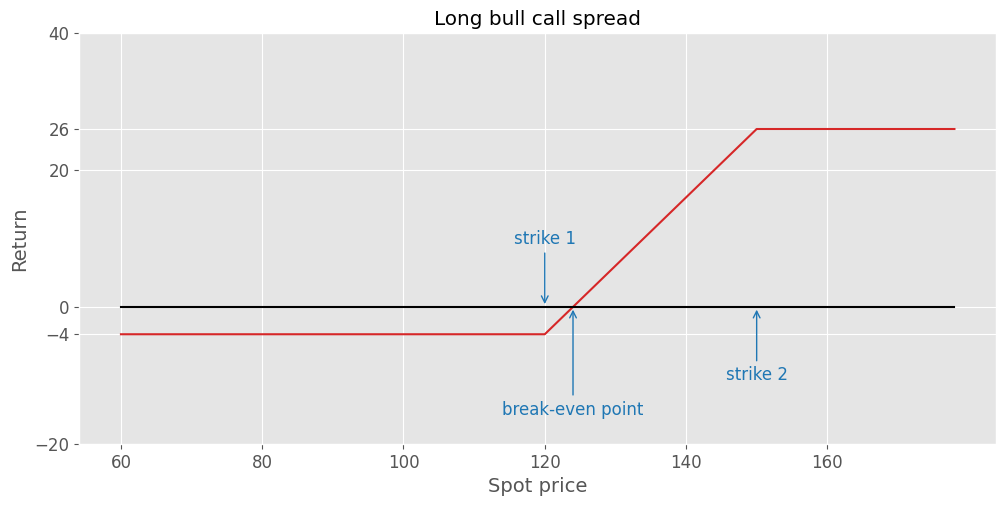

In [43]:
fig, ax = plt.subplots(figsize=(10, 5), dpi=100)

ax.plot(spot_prices, return_bull_call_spread(spot_prices, K, K2, V, V2), color='tab:red')
ax.plot(spot_prices, np.zeros(len(spot_prices)), color='black')

ax.set_xlabel('Spot price')
ax.set_ylabel('Return')

ax.set_yticks(list(np.arange(-20, 50, 20)) + [-V+V2] + [K2 - K + V2 - V])
ax.set_xticks(list(np.arange(60, N, 20)))

ax.annotate("strike 1", xy=(K, 0), xytext=(K, 10), size=12, va='center', ha='center', arrowprops=dict(arrowstyle='->',lw=1, color='tab:blue'), color='tab:blue')
ax.annotate("strike 2", xy=(K2, 0), xytext=(K2, -10), size=12, va='center', ha='center', arrowprops=dict(arrowstyle='->',lw=1, color='tab:blue'), color='tab:blue')
ax.annotate("break-even point", xy=(K+V-V2, 0), xytext=(K+V-V2, -15), size=12, va='center', ha='center', arrowprops=dict(arrowstyle='->',lw=1, color='tab:blue'), color='tab:blue')
ax.set_title('Long bull call spread')

plt.tight_layout(pad=0.5)
# plt.savefig('Growth_3_eng.pdf', dpi=300)
plt.show()

### 4. Cash-secured put option

In [44]:
V_put = 7
spot_prices = np.arange(80, N, 2)

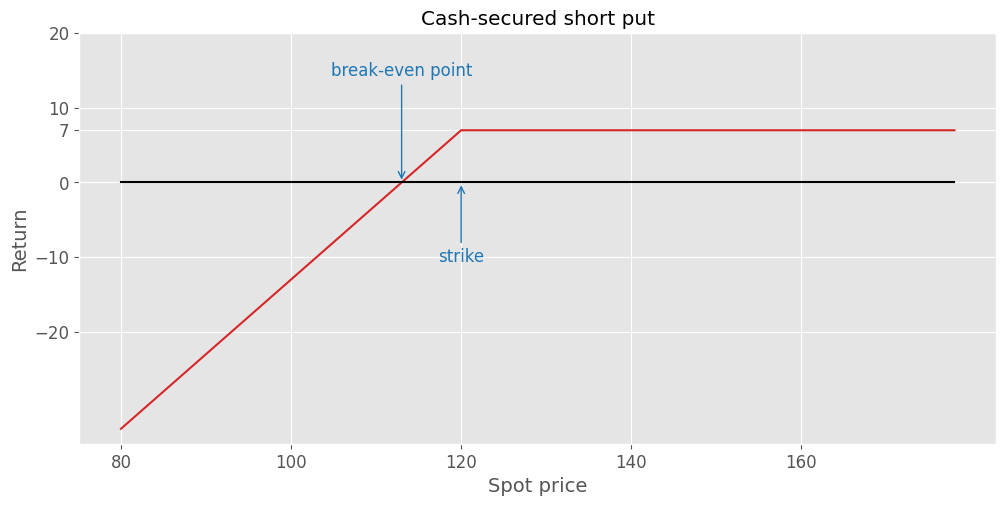

In [45]:
fig, ax = plt.subplots(figsize=(10, 5), dpi=100)

ax.plot(spot_prices, return_cash_secured_put(spot_prices, K, V_put), color='tab:red')
ax.plot(spot_prices, np.zeros(len(spot_prices)), color='black')

ax.set_xlabel('Spot price')
ax.set_ylabel('Return')

ax.set_yticks(list(np.arange(-20, 30, 10)) + [V_put])
ax.set_xticks(list(np.arange(80, N, 20)))

ax.annotate("strike", xy=(K, 0), xytext=(K, -10), size=12, va='center', ha='center', arrowprops=dict(arrowstyle='->',lw=1, color='tab:blue'), color='tab:blue')
ax.annotate("break-even point", xy=(K-V_put, 0), xytext=(K-V_put, 15), size=12, va='center', ha='center', arrowprops=dict(arrowstyle='->',lw=1, color='tab:blue'), color='tab:blue')
ax.set_title('Cash-secured short put')

plt.tight_layout(pad=0.5)
# plt.savefig('Growth_4_eng.pdf', dpi=300)
plt.show()

### 5. Inverse bull spread (Bull backspread)

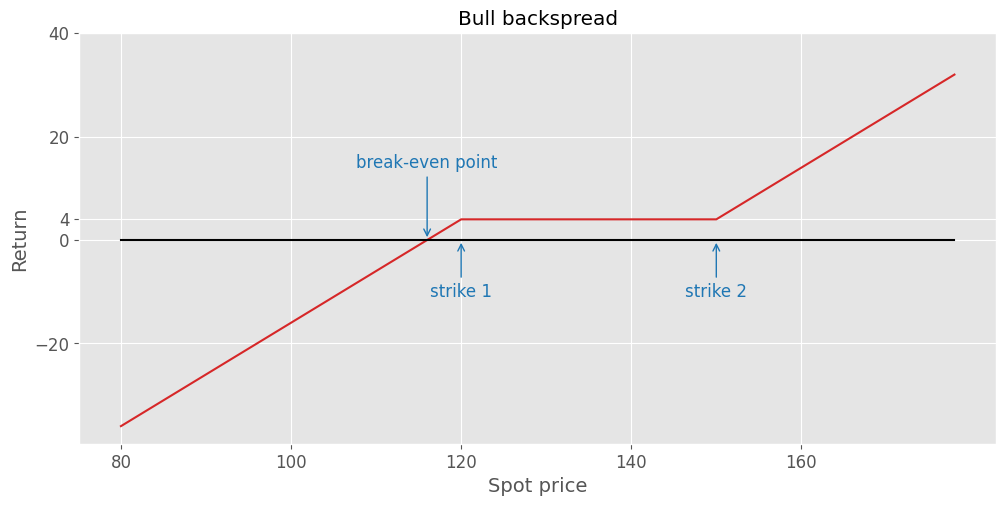

In [46]:
fig, ax = plt.subplots(figsize=(10, 5), dpi=100)

ax.plot(spot_prices, return_inverse_bull_spread(spot_prices, K, K2, V, V2), color='tab:red')
ax.plot(spot_prices, np.zeros(len(spot_prices)), color='black')

ax.set_xlabel('Spot price')
ax.set_ylabel('Return')

ax.set_yticks(list(np.arange(-20, 50, 20)) + [V-V2])
ax.set_xticks(list(np.arange(80, N, 20)))

ax.annotate("strike 1", xy=(K, 0), xytext=(K, -10), size=12, va='center', ha='center', arrowprops=dict(arrowstyle='->',lw=1, color='tab:blue'), color='tab:blue')
ax.annotate("strike 2", xy=(K2, 0), xytext=(K2, -10), size=12, va='center', ha='center', arrowprops=dict(arrowstyle='->',lw=1, color='tab:blue'), color='tab:blue')
ax.annotate("break-even point", xy=(K-V+V2, 0), xytext=(K-V+V2, 15), size=12, va='center', ha='center', arrowprops=dict(arrowstyle='->',lw=1, color='tab:blue'), color='tab:blue')
ax.set_title('Bull backspread')

plt.tight_layout(pad=0.5)
# plt.savefig('Growth_5_eng.pdf', dpi=300)
plt.show()

## Falling market strategies

In [6]:
def return_put(spot: np.array, strike, V) -> np.array:
    return payoff_put(spot, strike) - V

def payoff_bear_put_spread(spot: np.array, strike, strike2) -> np.array:
    return -payoff_put(spot, strike) + payoff_put(spot, strike2)

def return_bear_put_spread(spot: np.array, strike, strike2, V1, V2) -> np.array:
    return payoff_bear_put_spread(spot, strike, strike2) + V1 - V2

### 1. Long put option

In [47]:
V_put = 8
N = 180
spot_prices = np.arange(80, N, 2)
K = 120

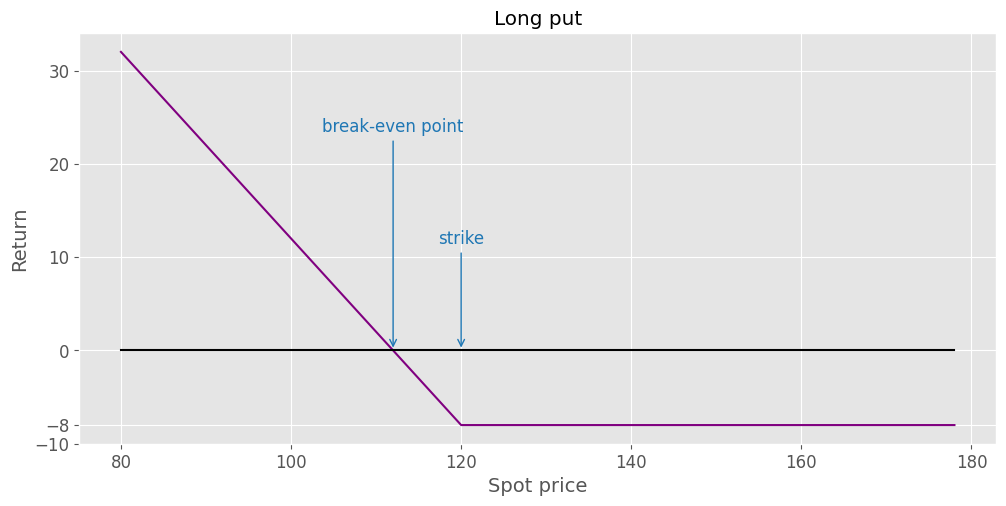

In [48]:
fig, ax = plt.subplots(figsize=(10, 5), dpi=100)

ax.plot(spot_prices, return_put(spot_prices, K, V_put), color='purple')
ax.plot(spot_prices, np.zeros(len(spot_prices)), color='black')

ax.set_xlabel('Spot price')
ax.set_ylabel('Return')

ax.set_yticks(list(np.arange(-10, 40, 10)) + [-V_put])
ax.set_xticks(list(np.arange(80, 200, 20)))
# ax.set_xticks(list(ax.get_xticks()) + [120])

ax.annotate("strike", xy=(K, 0), xytext=(K, 12), size=12, va='center', ha='center', arrowprops=dict(arrowstyle='->',lw=1, color='tab:blue'), color='tab:blue')
ax.annotate("break-even point", xy=(K-V_put, 0), xytext=(K-V_put, 24), size=12, va='center', ha='center', arrowprops=dict(arrowstyle='->',lw=1, color='tab:blue'), color='tab:blue')
ax.set_title('Long put')

plt.tight_layout(pad=0.5)
# plt.savefig('Falling_1_eng.pdf', dpi=300)
plt.show()

### 2. Long bear put spread

In [49]:
V_put_sell = 6
V_put_buy = 12
K2 = 140

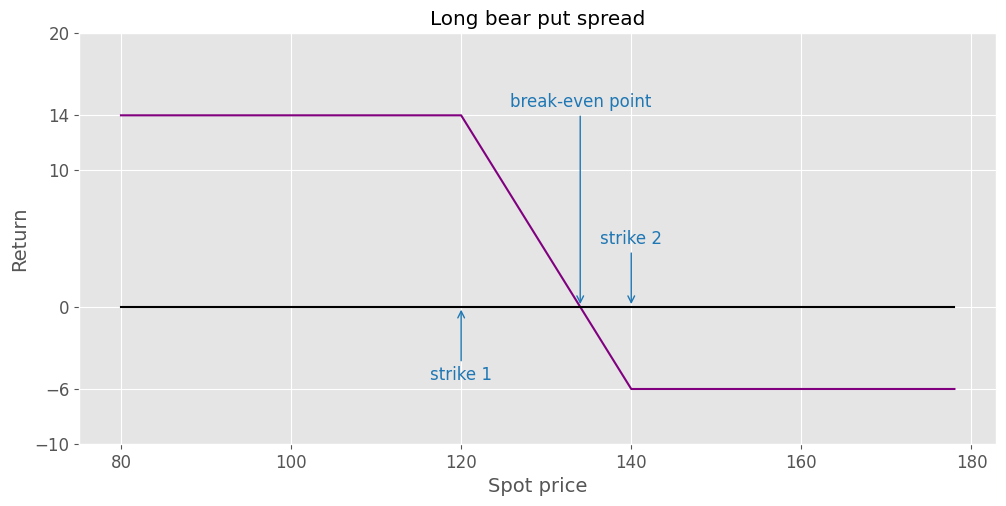

In [50]:
fig, ax = plt.subplots(figsize=(10, 5), dpi=100)

ax.plot(spot_prices, return_bear_put_spread(spot_prices, K, K2, V_put_sell, V_put_buy), color='purple')
ax.plot(spot_prices, np.zeros(len(spot_prices)), color='black')

ax.set_xlabel('Spot price')
ax.set_ylabel('Return')

ax.set_yticks(list(np.arange(-10, 30, 10)) + [V_put_sell-V_put_buy] + [K2-K+V_put_sell-V_put_buy])
ax.set_xticks(list(np.arange(80, 200, 20)))

ax.annotate("strike 1", xy=(K, 0), xytext=(K, -5), size=12, va='center', ha='center', arrowprops=dict(arrowstyle='->',lw=1, color='tab:blue'), color='tab:blue')
ax.annotate("strike 2", xy=(K2, 0), xytext=(K2, 5), size=12, va='center', ha='center', arrowprops=dict(arrowstyle='->',lw=1, color='tab:blue'), color='tab:blue')
ax.annotate("break-even point", xy=(K2-V_put_buy+V_put_sell, 0), xytext=(K2-V_put_buy+V_put_sell, 15), size=12, va='center', ha='center', arrowprops=dict(arrowstyle='->',lw=1, color='tab:blue'), color='tab:blue')
ax.set_title('Long bear put spread')

plt.tight_layout(pad=0.5)
# plt.savefig('Falling_2_eng.pdf', dpi=300)
plt.show()

## Volatility market strategies

In [16]:
def payoff_long_straddle(spot: np.array, strike) -> np.array:
    return payoff_call(spot, strike) + payoff_put(spot, strike)

def return_long_straddle(spot: np.array, strike, V1, V2) -> np.array:
    return payoff_long_straddle(spot, strike) - V1 - V2


def payoff_long_strangle(spot: np.array, strike, strike2) -> np.array:
    return payoff_call(spot, strike2) + payoff_put(spot, strike)

def return_long_strangle(spot: np.array, strike, strike2, V1, V2) -> np.array:
    return payoff_long_strangle(spot, strike, strike2) - V1 - V2


def payoff_call_backspread(spot: np.array, strike, strike2) -> np.array:
    return -payoff_call(spot, strike) + 2*payoff_call(spot, strike2)

def return_call_backspread(spot: np.array, strike, strike2, V1, V2) -> np.array:
    return payoff_call_backspread(spot, strike, strike2) + V1 - 2*V2


def payoff_put_ratio_spread(spot: np.array, strike, strike2) -> np.array:
    return payoff_put(spot, strike2) - 2*payoff_put(spot, strike)

def return_put_ratio_spread(spot: np.array, strike, strike2, V1, V2) -> np.array:
    return payoff_put_ratio_spread(spot, strike, strike2) + 2*V1 - V2

### 1. Long straddle

In [51]:
N = 190
spot_prices = np.arange(50, N, 2)
K = 120
K2 = 140
V_put_sell = 6
V_put_buy = 10
V_call_buy = 12

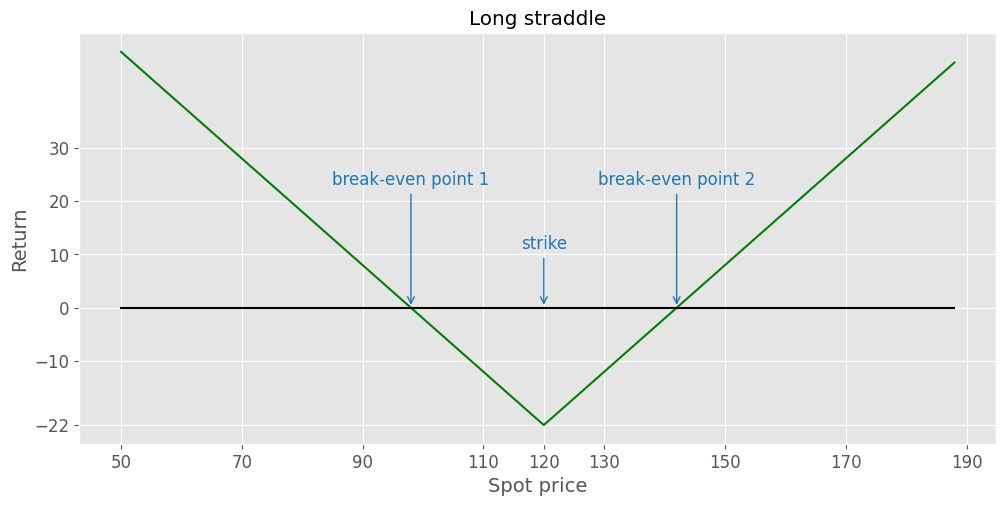

In [52]:
fig, ax = plt.subplots(figsize=(10, 5), dpi=100)

ax.plot(spot_prices, return_long_straddle(spot_prices, K, V_call_buy, V_put_buy), color='green')
ax.plot(spot_prices, np.zeros(len(spot_prices)), color='black')

ax.set_xlabel('Spot price')
ax.set_ylabel('Return')

ax.set_yticks(list(np.arange(-10, 40, 10)) + [-V_call_buy-V_put_buy])
ax.set_xticks(list(np.arange(50, 200, 20)) + [K])

ax.annotate("strike", xy=(K, 0), xytext=(K, 12), size=12, va='center', ha='center', arrowprops=dict(arrowstyle='->',lw=1, color='tab:blue'), color='tab:blue')
ax.annotate("break-even point 1", xy=(K-V_call_buy-V_put_buy, 0), xytext=(K-V_call_buy-V_put_buy, 24), size=12, va='center', ha='center', arrowprops=dict(arrowstyle='->',lw=1, color='tab:blue'), color='tab:blue')
ax.annotate("break-even point 2", xy=(K+V_call_buy+V_put_buy, 0), xytext=(K+V_call_buy+V_put_buy, 24), size=12, va='center', ha='center', arrowprops=dict(arrowstyle='->',lw=1, color='tab:blue'), color='tab:blue')
ax.set_title('Long straddle')

plt.tight_layout(pad=0.5)
# plt.savefig('Volatile_1_eng.pdf', dpi=300)
plt.show()

### 2. Long Strangle

In [53]:
N = 180
spot_prices = np.arange(80, N, 2)

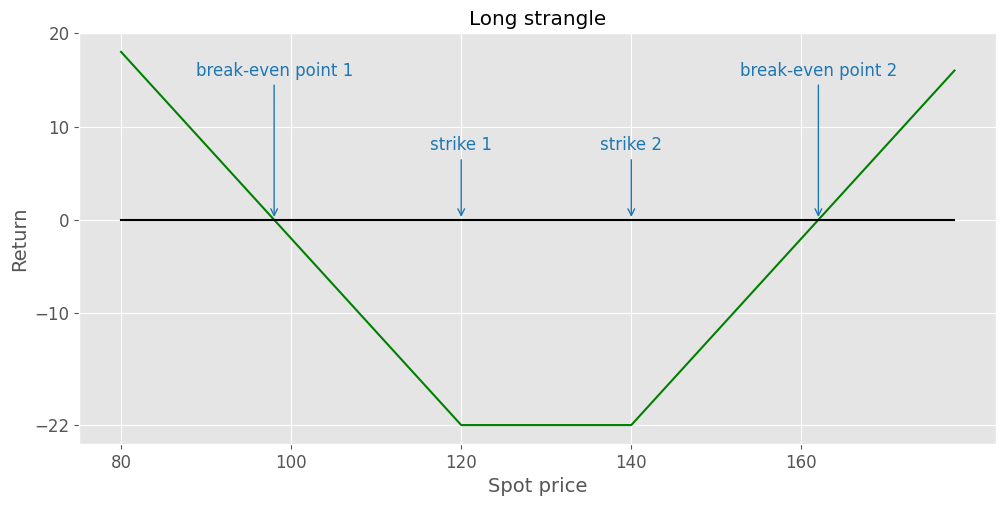

In [54]:
fig, ax = plt.subplots(figsize=(10, 5), dpi=100)

ax.plot(spot_prices, return_long_strangle(spot_prices, K, K2, V_call_buy, V_put_buy), color='green')
ax.plot(spot_prices, np.zeros(len(spot_prices)), color='black')

ax.set_xlabel('Spot price')
ax.set_ylabel('Return')

ax.set_yticks(list(np.arange(-10, 30, 10)) + [-V_call_buy-V_put_buy])
ax.set_xticks(list(np.arange(80, N, 20)))
# ax.set_xticks(list(ax.get_xticks()) + [120])

ax.annotate("strike 1", xy=(K, 0), xytext=(K, 8), size=12, va='center', ha='center', arrowprops=dict(arrowstyle='->',lw=1, color='tab:blue'), color='tab:blue')
ax.annotate("strike 2", xy=(K2, 0), xytext=(K2, 8), size=12, va='center', ha='center', arrowprops=dict(arrowstyle='->',lw=1, color='tab:blue'), color='tab:blue')
ax.annotate("break-even point 1", xy=(K-V_call_buy-V_put_buy, 0), xytext=(K-V_call_buy-V_put_buy, 16), size=12, va='center', ha='center', arrowprops=dict(arrowstyle='->',lw=1, color='tab:blue'), color='tab:blue')
ax.annotate("break-even point 2", xy=(K2+V_call_buy+V_put_buy, 0), xytext=(K2+V_call_buy+V_put_buy, 16), size=12, va='center', ha='center', arrowprops=dict(arrowstyle='->',lw=1, color='tab:blue'), color='tab:blue')
ax.set_title('Long strangle')


plt.tight_layout(pad=0.5)
# plt.savefig('Volatile_2_eng.pdf', dpi=300)
plt.show()

### 3. Call backspread

In [55]:
V_call_sell = 8
V_call_buy = 12
N = 210
spot_prices = np.arange(80, N, 2)

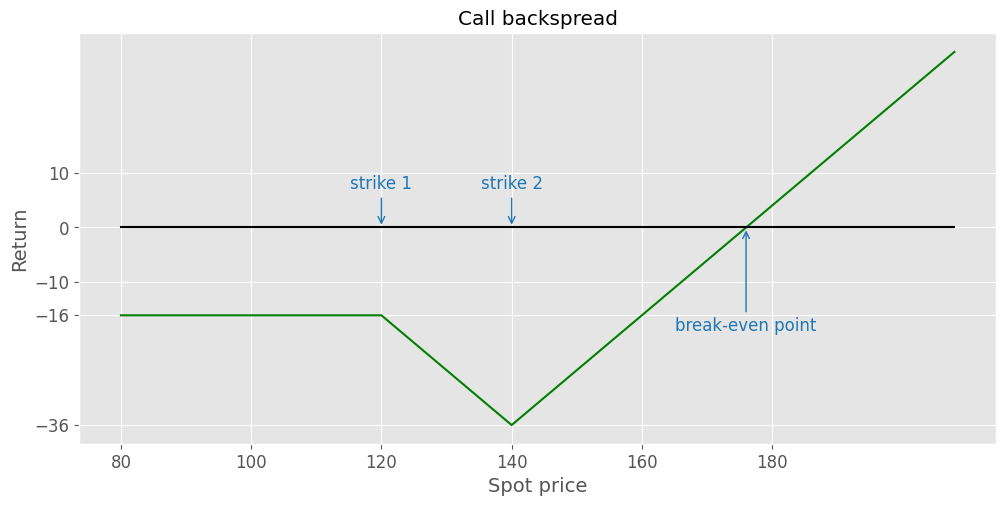

In [56]:
fig, ax = plt.subplots(figsize=(10, 5), dpi=100)

ax.plot(spot_prices, return_call_backspread(spot_prices, K, K2, V_call_sell, V_call_buy), color='green')
ax.plot(spot_prices, np.zeros(len(spot_prices)), color='black')

ax.set_xlabel('Spot price')
ax.set_ylabel('Return')

ax.set_yticks(list(np.arange(-10, 20, 10)) + [-2*V_call_buy+V_call_sell] + [K - K2 + V_call_sell - 2*V_call_buy])
ax.set_xticks(list(np.arange(80, 200, 20)))

ax.annotate("strike 1", xy=(K, 0), xytext=(K, 8), size=12, va='center', ha='center', arrowprops=dict(arrowstyle='->',lw=1, color='tab:blue'), color='tab:blue')
ax.annotate("strike 2", xy=(K2, 0), xytext=(K2, 8), size=12, va='center', ha='center', arrowprops=dict(arrowstyle='->',lw=1, color='tab:blue'), color='tab:blue')
ax.annotate("break-even point", xy=(2*K2-K+2*V_call_buy-V_call_sell, 0), xytext=(2*K2-K+2*V_call_buy-V_call_sell, -2*V_call_buy+V_call_sell-2), size=12, va='center', ha='center', arrowprops=dict(arrowstyle='->',lw=1, color='tab:blue'), color='tab:blue')
ax.set_title('Call backspread')

plt.tight_layout(pad=0.5)
# plt.savefig('Volatile_3_eng.pdf', dpi=300)
plt.show()

### 4. Put Ratio Spread

In [57]:
V_put_sell = 8
V_put_buy = 12
N = 180
spot_prices = np.arange(80, N, 2)

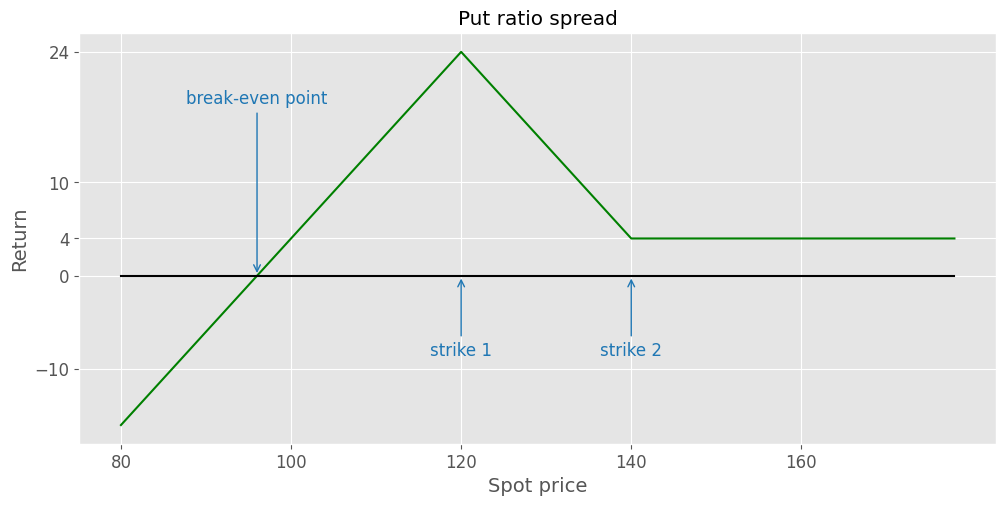

In [58]:
fig, ax = plt.subplots(figsize=(10, 5), dpi=100)

ax.plot(spot_prices, return_put_ratio_spread(spot_prices, K, K2, V_put_sell, V_put_buy), color='green')
ax.plot(spot_prices, np.zeros(len(spot_prices)), color='black')

ax.set_xlabel('Spot price')
ax.set_ylabel('Return')

ax.set_yticks(list(np.arange(-10, 20, 10)) + [-V_put_buy+2*V_put_sell] + [K2 - K + 2*V_put_sell - V_put_buy])
ax.set_xticks(list(np.arange(80, 180, 20)))

ax.annotate("strike 1", xy=(K, 0), xytext=(K, -V_put_buy+2*V_put_sell-12), size=12, va='center', ha='center', arrowprops=dict(arrowstyle='->',lw=1, color='tab:blue'), color='tab:blue')
ax.annotate("strike 2", xy=(K2, 0), xytext=(K2, -V_put_buy+2*V_put_sell-12), size=12, va='center', ha='center', arrowprops=dict(arrowstyle='->',lw=1, color='tab:blue'), color='tab:blue')
ax.annotate("break-even point", xy=(-(K2 - 2*K - V_put_buy + 2*V_put_sell), 0), xytext=(-(K2 - 2*K - V_put_buy + 2*V_put_sell), -V_put_buy+2*V_put_sell+15), size=12, va='center', ha='center', arrowprops=dict(arrowstyle='->',lw=1, color='tab:blue'), color='tab:blue')
ax.set_title('Put ratio spread')

plt.tight_layout(pad=0.5)
# plt.savefig('Volatile_4_eng.pdf', dpi=300)
plt.show()

## Neutral Market strategies

In [3]:
def payoff_short_strangle(spot: np.array, strike, strike2) -> np.array:
    return - payoff_put(spot, strike) - payoff_call(spot, strike2) 

def return_short_strangle(spot: np.array, strike, strike2, V1, V2) -> np.array:
    return payoff_short_strangle(spot, strike, strike2) + V1 + V2



def payoff_butterfly(spot: np.array, strike, strike2, strike3) -> np.array:
    return - 2*payoff_call(spot, strike) + payoff_call(spot, strike2) + payoff_call(spot, strike3)  

def return_butterfly(spot: np.array, strike, strike2, strike3, V1, V2, V3) -> np.array:
    return payoff_butterfly(spot, strike, strike2, strike3) + 2*V1 - V2 - V3



def payoff_condor(spot: np.array, strike, strike2, strike3, strike4) -> np.array:
    return payoff_call(spot, strike) - payoff_call(spot, strike2) - payoff_call(spot, strike3) + payoff_call(spot, strike4)  

def return_condor(spot: np.array, strike, strike2, strike3, strike4, V1, V2, V3, V4) -> np.array:
    return payoff_condor(spot, strike, strike2, strike3, strike4) - V1 + V2 + V3 - V4

In [4]:
N = 160
spot_prices = np.arange(60, N, 2)
V_put_sell = 10
V_call_sell = 12
K = 100
K2 = 120

### 1. Short Strangle

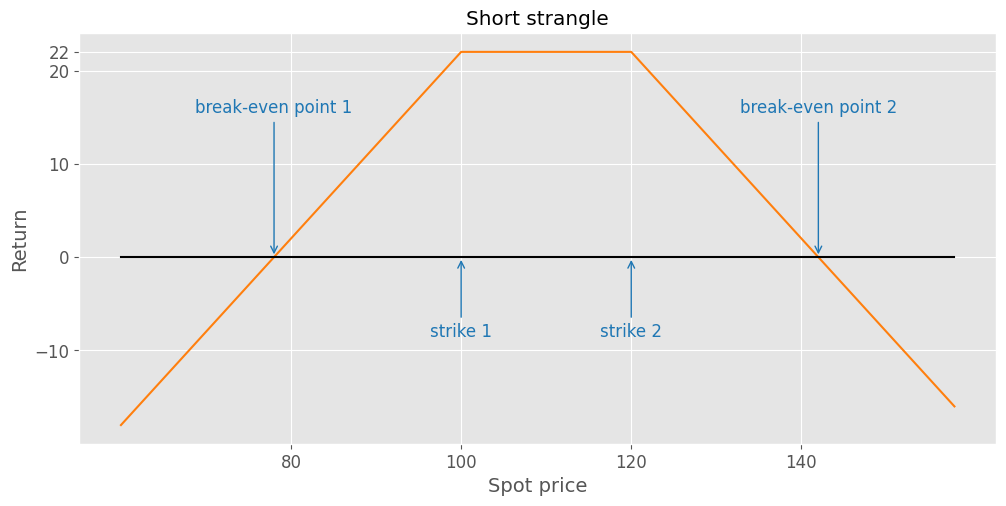

In [8]:
fig, ax = plt.subplots(figsize=(10, 5), dpi=100)

ax.plot(spot_prices, return_short_strangle(spot_prices, K, K2, V_put_sell, V_call_sell), color='tab:orange')
ax.plot(spot_prices, np.zeros(len(spot_prices)), color='black')

ax.set_xlabel('Spot price')
ax.set_ylabel('Return')

ax.set_yticks(list(np.arange(-10, 30, 10)) + [V_put_sell+V_call_sell])
ax.set_xticks(list(np.arange(80, N, 20)))
# ax.set_xticks(list(ax.get_xticks()) + [120])

ax.annotate("strike 1", xy=(K, 0), xytext=(K, -8), size=12, va='center', ha='center', arrowprops=dict(arrowstyle='->',lw=1, color='tab:blue'), color='tab:blue')
ax.annotate("strike 2", xy=(K2, 0), xytext=(K2, -8), size=12, va='center', ha='center', arrowprops=dict(arrowstyle='->',lw=1, color='tab:blue'), color='tab:blue')
ax.annotate("break-even point 1", xy=(K-V_call_sell-V_put_sell, 0), xytext=(K-V_call_sell-V_put_sell, 16), size=12, va='center', ha='center', arrowprops=dict(arrowstyle='->',lw=1, color='tab:blue'), color='tab:blue')
ax.annotate("break-even point 2", xy=(K2+V_call_sell+V_put_sell, 0), xytext=(K2+V_call_sell+V_put_sell, 16), size=12, va='center', ha='center', arrowprops=dict(arrowstyle='->',lw=1, color='tab:blue'), color='tab:blue')
ax.set_title('Short strangle')


plt.tight_layout(pad=0.5)
# plt.savefig('Neutral_1_eng.pdf', dpi=300)
plt.show()

### 2. Long Call Butterfly Spread 

In [14]:
V1_sell = 9
V2_buy = 14
V3_buy = 11
K = 120
K2 = 100
K3 = 140

N = 160
spot_prices = np.arange(80, N, 2)

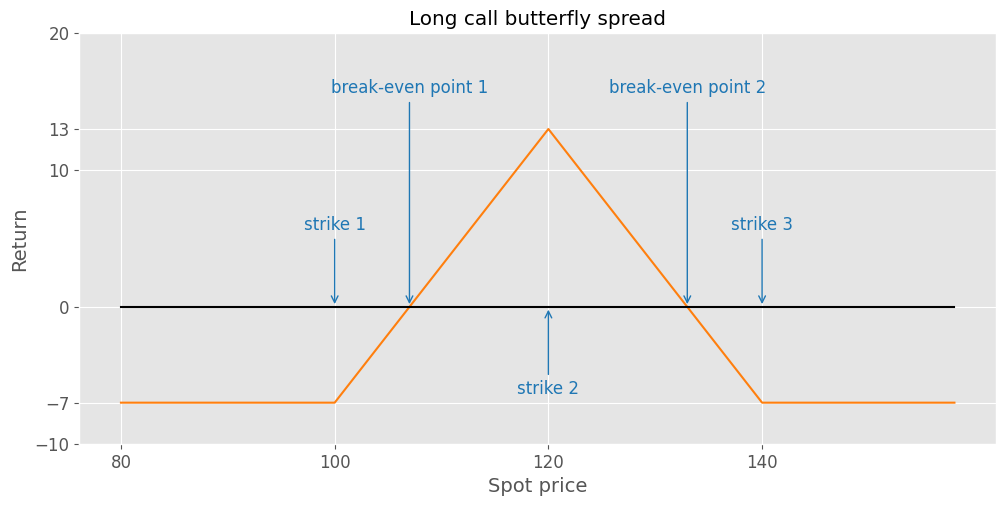

In [17]:
fig, ax = plt.subplots(figsize=(10, 5), dpi=100)

ax.plot(spot_prices, return_butterfly(spot_prices, K, K2, K3, V1_sell, V2_buy, V3_buy), color='tab:orange')
ax.plot(spot_prices, np.zeros(len(spot_prices)), color='black')

ax.set_xlabel('Spot price', fontsize=14)
ax.set_ylabel('Return', fontsize=14)

ax.set_yticks(list(np.arange(-10, 30, 10)) + [2*V1_sell - V2_buy - V3_buy] + [K-K2 + 2*V1_sell-V2_buy-V3_buy])
ax.set_xticks(list(np.arange(80, N, 20)))
# ax.set_xticks(list(ax.get_xticks()) + [120])

ax.annotate("strike 2", xy=(K, 0), xytext=(K, -6), size=12, va='center', ha='center', arrowprops=dict(arrowstyle='->',lw=1, color='tab:blue'), color='tab:blue')
ax.annotate("strike 1", xy=(K2, 0), xytext=(K2, 6), size=12, va='center', ha='center', arrowprops=dict(arrowstyle='->',lw=1, color='tab:blue'), color='tab:blue')
ax.annotate("strike 3", xy=(K3, 0), xytext=(K3, 6), size=12, va='center', ha='center', arrowprops=dict(arrowstyle='->',lw=1, color='tab:blue'), color='tab:blue')
ax.annotate("break-even point 2", xy=(2*K - K2 + (2*V1_sell-V2_buy-V3_buy), 0), xytext=(2*K - K2 + (2*V1_sell-V2_buy-V3_buy), 16), size=12, va='center', ha='center', arrowprops=dict(arrowstyle='->',lw=1, color='tab:blue'), color='tab:blue')
ax.annotate("break-even point 1", xy=(K2 -(2*V1_sell-V2_buy-V3_buy), 0), xytext=(K2 - (2*V1_sell-V2_buy-V3_buy), 16), size=12, va='center', ha='center', arrowprops=dict(arrowstyle='->',lw=1, color='tab:blue'), color='tab:blue')
ax.set_title('Long call butterfly spread')


plt.tight_layout(pad=0.5)
# plt.savefig('Neutral_2_eng.pdf', dpi=300)
plt.show()

### 3. Iron Condor

In [30]:
V1_buy = 11
V2_sell = 8
V3_sell = 8
V4_buy = 14
K = 100
K2 = 120
K3 = 140
K4 = 160

N = 180
spot_prices = np.arange(80, N, 2)

In [31]:
-K + K2 + K3 + (- V1_buy + V2_sell + V3_sell - V4_buy)

151

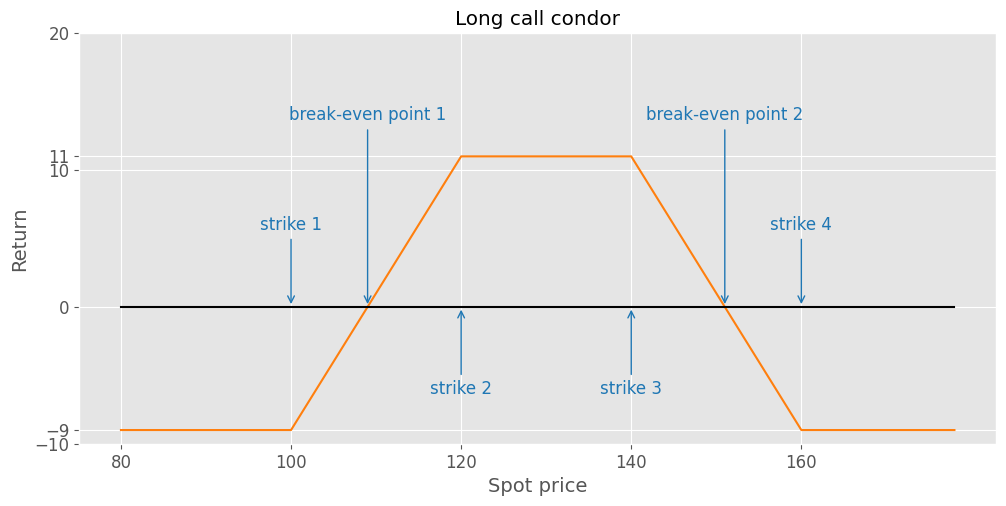

In [34]:
fig, ax = plt.subplots(figsize=(10, 5), dpi=100)

ax.plot(spot_prices, return_condor(spot_prices, K, K2, K3, K4, V1_buy, V2_sell, V3_sell, V4_buy), color='tab:orange')
ax.plot(spot_prices, np.zeros(len(spot_prices)), color='black')

ax.set_xlabel('Spot price', fontsize=14)
ax.set_ylabel('Return', fontsize=14)

ax.set_yticks(list(np.arange(-10, 30, 10)) + [-V1_buy + V2_sell + V3_sell - V4_buy] + [-K+K2-V1_buy + V2_sell + V3_sell - V4_buy])
ax.set_xticks(list(np.arange(80, N, 20)))
# ax.set_xticks(list(ax.get_xticks()) + [120])

ax.annotate("strike 1", xy=(K, 0), xytext=(K, 6), size=12, va='center', ha='center', arrowprops=dict(arrowstyle='->',lw=1, color='tab:blue'), color='tab:blue')
ax.annotate("strike 2", xy=(K2, 0), xytext=(K2, -6), size=12, va='center', ha='center', arrowprops=dict(arrowstyle='->',lw=1, color='tab:blue'), color='tab:blue')
ax.annotate("strike 3", xy=(K3, 0), xytext=(K3, -6), size=12, va='center', ha='center', arrowprops=dict(arrowstyle='->',lw=1, color='tab:blue'), color='tab:blue')
ax.annotate("strike 4", xy=(K4, 0), xytext=(K4, 6), size=12, va='center', ha='center', arrowprops=dict(arrowstyle='->',lw=1, color='tab:blue'), color='tab:blue')
ax.annotate("break-even point 2", xy=(-K + K2 + K3 + (- V1_buy + V2_sell + V3_sell - V4_buy), 0), xytext=(-K + K2 + K3 + (- V1_buy + V2_sell + V3_sell - V4_buy), 14), size=12, va='center', ha='center', arrowprops=dict(arrowstyle='->',lw=1, color='tab:blue'), color='tab:blue')
ax.annotate("break-even point 1", xy=(K - (- V1_buy + V2_sell + V3_sell - V4_buy), 0), xytext=(K - (- V1_buy + V2_sell + V3_sell - V4_buy), 14), size=12, va='center', ha='center', arrowprops=dict(arrowstyle='->',lw=1, color='tab:blue'), color='tab:blue')
ax.set_title('Long call condor')


plt.tight_layout(pad=0.5)
# plt.savefig('Neutral_3_eng.pdf', dpi=300)
plt.show()

## Example of an option-based synthetic position for futures

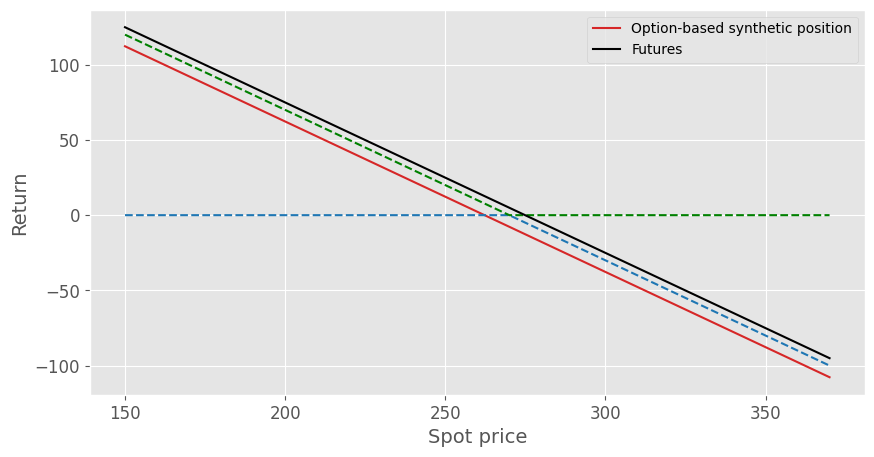

In [33]:
plt.subplots(figsize=(10, 5), dpi=100)

plt.plot(np.arange(150, 380, 10), -payoff_call(np.arange(150, 380, 10), 270) + 0.08 + payoff_put(np.arange(150, 380, 10), 270) - 7.8, \
         label='Option-based synthetic position', color='tab:red')
plt.plot(np.arange(150, 380, 10), -payoff_call(np.arange(150, 380, 10), 270), '--', color='tab:blue')
plt.plot(np.arange(150, 380, 10), payoff_put(np.arange(150, 380, 10), 270), '--', color='green')
plt.plot(np.arange(150, 380, 10), -np.arange(150, 380, 10) + 274.94, label='Futures', color='black')

plt.legend()
plt.ylabel('Return')
plt.xlabel('Spot price')
plt.show()